In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy.stats import beta
from scipy.special import gamma
from scipy.optimize import minimize

## the beta distribution
$$f(x|\alpha,\beta)=\frac{\Gamma(\alpha+\beta)}{\Gamma({\alpha})\Gamma(\beta)} x^{\alpha -1} (1-x)^{{\beta -1}}$$

$$ln L(\alpha,\beta)=\sum_{i=1}^{n}lnf(x_i|\alpha,\beta)$$

# Q1

In [3]:
arr=genfromtxt("datafile2.txt")

In [4]:
def betad(x,a,b):
    return gamma(a+b)/(gamma(a)*gamma(b))*x**(a-1)*(1-x)**(b-1)

In [5]:
def lnL(para,data):
    a=para[0]
    b=para[1]
    return -1*sum([log(betad(x,a,b)) for x in data])

In [6]:
result=minimize(lnL,[3,6],args=arr)
al = result.x[0]
be = result.x[1]
print(result)

      fun: -21.00108771132605
 hess_inv: array([[0.35730227, 0.69777126],
       [0.69777126, 1.77053395]])
      jac: array([7.15255737e-07, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 32
      nit: 6
     njev: 8
   status: 0
  success: True
        x: array([2.82466467, 6.02949922])


In [7]:
V_al = result.hess_inv[0,0]
V_be = result.hess_inv[1,1]
Cov = result.hess_inv[0,1]
sal=sqrt(V_al)
sbe=sqrt(V_be)
rho=Cov/(sal*sbe)
print('the estimated alpha-hat: %s'%round(al,3))
print('the estimated beta-hat: %s'%round(be,3) )
print('the estimated standard deviation of alpha is: %s'%round(sal,3))
print('the estimated standard deviation of beta is: %s'%round(sbe,3))
print('Correlation coeff = %s'%round(rho,3))

the estimated alpha-hat: 2.825
the estimated beta-hat: 6.029
the estimated standard deviation of alpha is: 0.598
the estimated standard deviation of beta is: 1.331
Correlation coeff = 0.877


# Q2

In [8]:
x=linspace(0,1,1000)

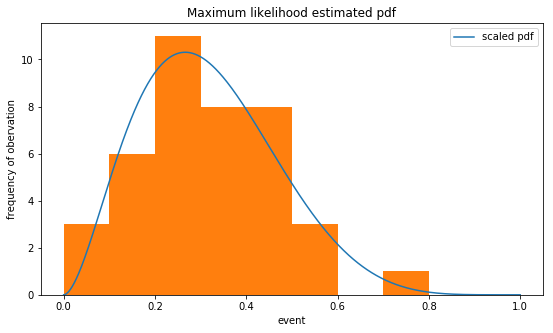

In [9]:
figure(figsize=(9,5))
bs=linspace(0,1,11)
plot(x,len(arr)*0.1*beta.pdf(x,al,be),label='scaled pdf')
hist(arr,bins=bs)
xlabel('event')
ylabel('frequency of obervation')
title('Maximum likelihood estimated pdf')
legend(loc='best')
show()

# Q3

In [36]:
x = linspace(1,5,100)
y = linspace(2,10,100)

In [37]:
Z=[[-lnL([i,j],arr) for i in x] for j in y]

In [34]:
con=[0.5,1.15,2.31,3.00]
cons = flip([-result.fun-i for i in con])

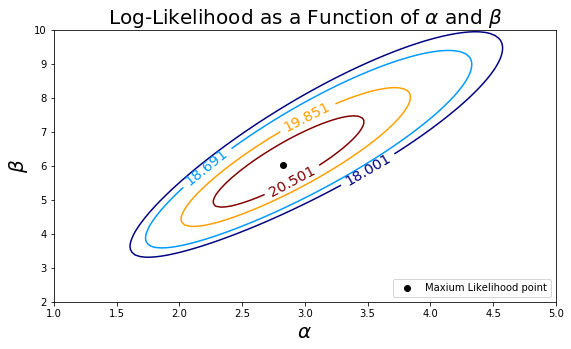

In [38]:
figure(figsize=(9,5))
cs=contour(x,y,Z, cmap='jet',levels=cons)
clabel(cs, fontsize='x-large')
xlabel(r'$\alpha$',fontsize=20)
ylabel(r'$\beta$',fontsize=20)
scatter(al,be, color='k', label='Maxium Likelihood point')
title(r'Log-Likelihood as a Function of $\alpha$ and $\beta$',fontsize=20)
legend(loc='lower right')
show()

# Q4

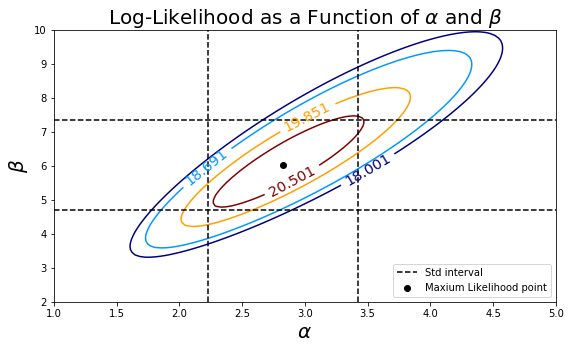

In [15]:
figure(figsize=(9,5))
cs=contour(x,y,Z, cmap='jet',levels=cons)
clabel(cs, fontsize='x-large')
xlabel(r'$\alpha$',fontsize=20)
ylabel(r'$\beta$',fontsize=20)
scatter(al,be, color='k', label='Maxium Likelihood point')
axvline(al+sal,ls='--', color='k', label='Std interval')
axvline(al-sal,ls='--', color='k')
axhline(be+sbe,ls='--', color='k')
axhline(be-sbe,ls='--', color='k')
title(r'Log-Likelihood as a Function of $\alpha$ and $\beta$',fontsize=20)
legend(loc='lower right')
show()

# Q5

In [16]:
ds=[beta.rvs(al,be,size=40) for i in range(1000)]

In [17]:
est=[minimize(lnL,[3,6],args=data) for data in ds]

In [18]:
estx=array([est[i].x for i in range(1000)])
als=estx[:,0]
bes=estx[:,1]

In [19]:
print('mean of alpha-hat is: %s compared with %s in Q1'%(round(mean(als),3),round(al,3)))
print('mean of beta-hat is: %s compared with %s in Q1'%(round(mean(bes),3),round(be,3)))

mean of alpha-hat is: 3.028 compared with 2.825 in Q1
mean of beta-hat is: 6.515 compared with 6.029 in Q1


In [20]:
print('the std of alpha-hat is : %s compared with %s in Q1'%(round(std(als,ddof=1),3),round(sal,3)))
print('the std of beta-hat is: %s compared with %s in Q1'%(round(std(bes,ddof=1),3),round(sbe,3)))
print('the correlation coefficient is: %s compared with %s in Q1'%(round(corrcoef(als,bes)[0,1],3),round(rho,3)))

the std of alpha-hat is : 0.7 compared with 0.598 in Q1
the std of beta-hat is: 1.581 compared with 1.331 in Q1
the correlation coefficient is: 0.886 compared with 0.877 in Q1


# a.   

###  Compare the standard deviations of 1000 datasets and Q1, it can be seen that there is a bias between them, so stds in Q1 is  not a good estimation.   The subsample only has a size of 40, bigger sample size will give more accurate result.

# b.   

### The correlation coefficient from Q1 is a good estimate of the correlation coefficient from the 1000 pairs of parameter estimates.

# c.   

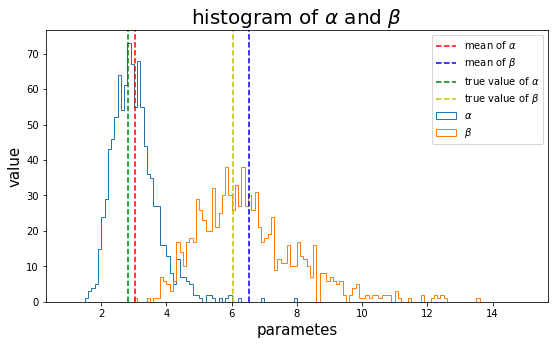

In [22]:
figure(figsize=(9,5))
bs=arange(1,15.1,0.1)
hist(als,bins=bs,histtype='step',label=r'$\alpha$')
hist(bes,bins=bs,histtype='step',label=r'$\beta$')
axvline(mean(als),ls='--', color='r', label=r'mean of $\alpha$')
axvline(mean(bes),ls='--', color='b', label=r'mean of $\beta}$')
axvline(al,ls='--', color='g', label=r'true value of $\alpha$')
axvline(be,ls='--', color='y', label=r'true value of $\beta$')

xlabel('parametes',size=15)
ylabel('value',size=15)
title(r'histogram of $\alpha$ and $\beta$',size=20)
legend(loc='best')
show()

### It can be seen that the true value is located on the left of the mean of the estimations, so the p-value should be the integration from the minimum to the true value .

In [29]:
bial=(mean(als)-al)/al
bibe=(mean(bes)-be)/be
print('the bias of alpha is:%s'%round(bial,3))
print('the bias of beta is:%s'%round(bibe,3))

the bias of alpha is:0.072
the bias of beta is:0.081


### It can be seen that for both parametres, the p-value is about 0.4

# d.   

### 68.3% is the expecation value 

In [24]:
tfuns=-1*array([lnL([al,be],i) for i in ds])  # the true value of log likelihood for 1000 datasets

In [25]:
funs=-1*array([est[i].fun for i in range(1000)])

In [26]:
fra=len(where(abs(funs-tfuns)<=1.15)[0])/len(funs)

In [27]:
print('the fraction of the dataset which satisfies the 1.15 range is: {0:5.1f}%'.format(fra*100))

the fraction of the dataset which satisfies the 1.15 range is:  68.0%


### It can be seen that the fraction in the 1.15 range is close to the expectation value.